In [28]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [12]:
def dummy_ebizz(data_in, dummy_target_variables):
    data_out = data_in[dummy_target_variables]
    for i in data_out.columns:
        data_out.loc[data_out[i]>=1,i] = 1
        data_out.loc[data_out[i]<1,i] = 0
    return data_out
        
def encoder_ebizz(data_in, data_out, variable):
    le = preprocessing.LabelEncoder()
    le.fit(data_in[variable])
    data_out[f"enc_{variable}"] = le.transform(data_in[variable])
    return data_out
        
def continuos_ebizz(data_in, data_out, variable):
    data_out[variable] = data_in[[variable]].fillna(0)
    return data_out

In [7]:
df = pd.read_csv("data/bq-results-20230124-133600-1674567388602.csv")

In [9]:
project_id = 'sp-ed-advana-dev-2j72' #(dev, ambiente mínimo donde quedaría si lo automatizamos)

columns_activate = ['target', 'updateDateTime', 'countryCode', 'origin',
                    'destination', 'flightNumber', 'departureTime',
                    'Migrated', 'directSale', 'stationId', 
                    'documentTypes', 'duration', 'cabinClass', 'bookingClass', 'fareBasis', 'equipment',
                    'origin_ndc', 'origin_detail_ndc',
                    'ssr_all_marks',  'has_registered_incident',
                    'flight_marks',
                    'tour_code',  'Dummy_GSTN', 'Dummy_CRPE', 'Dummy_INFR', 'Dummy_DEPU',
                    'Dummy_MEDA', 'Dummy_AUTK', 'Dummy_SMSR', 'Dummy_LAXP',
                    'Dummy_BRND', 'Dummy_WCHC', 'Dummy_WCMP', 'Dummy_OTH',
                    'Dummy_XBAF', 'Dummy_SETA', 'Dummy_INFT', 'Dummy_INAD',
                    'Dummy_SPEQ', 'Dummy_LOKX', 'Dummy_LCML', 'Dummy_TWOV',
                    'Dummy_NOCM', 'Dummy_WCHS', 'Dummy_GSSV', 'Dummy_GRPS',
                    'Dummy_PCDA', 'Dummy_TKNE', 'Dummy_DEPA', 'Dummy_RFIC',
                    'Dummy_TLAC', 'Dummy_FOID', 'Dummy_CHML', 'Dummy_XBGS',
                    'Dummy_SUCF', 'Dummy_CKIN', 'Dummy_CRPP', 'Dummy_KSML',
                    'Dummy_VIPD', 'Dummy_SSAS', 'Dummy_ADTK', 'Dummy_MENU',
                    'Dummy_DOCA', 'Dummy_SVAN', 'Dummy_GBAG', 'Dummy_GSSC',
                    'Dummy_OXYG', 'Dummy_VOML', 'Dummy_DCVI', 'Dummy_GSTA',
                    'Dummy_NSSW', 'reissuing_type', 'plating_airline', 'pax_type',
                    'status_coupon','operating_booking_class',
                    'FB_class_mkt', 'tour_code', 'flag_rt', 'aaa_city_code',
                    'home_city_code', 'oac_acc_code', 'agent_sine', 'gds_code',
                    'prorate_type', 'fare_calculation_type', 'flag_dcp', 'branded_fare',
                    'issuing_type', 'codeshare_involved','nego_group_flag', 'flag_group', 'flag_private'] # 'codeshare_involved', 

dummy_target_variables = ['target','Dummy_GSTN', 'Dummy_CRPE', 'Dummy_INFR', 'Dummy_DEPU',
                           'Dummy_MEDA', 'Dummy_AUTK', 'Dummy_SMSR', 'Dummy_LAXP',
                           'Dummy_BRND', 'Dummy_WCHC', 'Dummy_WCMP', 'Dummy_OTH',
                           'Dummy_XBAF', 'Dummy_SETA', 'Dummy_INFT', 'Dummy_INAD',
                           'Dummy_SPEQ', 'Dummy_LOKX', 'Dummy_LCML', 'Dummy_TWOV',
                           'Dummy_NOCM', 'Dummy_WCHS', 'Dummy_GSSV', 'Dummy_GRPS',
                           'Dummy_PCDA', 'Dummy_TKNE', 'Dummy_DEPA', 'Dummy_RFIC',
                           'Dummy_TLAC', 'Dummy_FOID', 'Dummy_CHML', 'Dummy_XBGS',
                           'Dummy_SUCF', 'Dummy_CKIN', 'Dummy_CRPP', 'Dummy_KSML',
                           'Dummy_VIPD', 'Dummy_SSAS', 'Dummy_ADTK', 'Dummy_MENU',
                           'Dummy_DOCA', 'Dummy_SVAN', 'Dummy_GBAG', 'Dummy_GSSC',
                           'Dummy_OXYG', 'Dummy_VOML', 'Dummy_DCVI', 'Dummy_GSTA',
                           'Dummy_NSSW', 'codeshare_involved','FB_class_mkt']#], 'codeshare_involved'

encoders_variables = ['countryCode', 'origin', 'destination', 'flightNumber', 
                      'Migrated', 'directSale', 'stationId', 
                      'documentTypes', 'cabinClass', 'bookingClass', 
                      'fareBasis', 'equipment','origin_ndc', 
                      'has_registered_incident', 'flight_marks', 'reissuing_type', 'plating_airline', 'pax_type',
                      'status_coupon', 'operating_booking_class',
                      'flag_rt', 'aaa_city_code', 'home_city_code', 'oac_acc_code', 
                      'agent_sine', 'gds_code', 'prorate_type', 
                      'flag_dcp', 'branded_fare', 'issuing_type', 'nego_group_flag', 
                      'flag_group', 'flag_private']

continuos_variable = ['fare_calculation_type', 'duration']

In [10]:
df1 = df[columns_activate]
df1["target"] = df1["target"].astype(int)

In [15]:
#preprocess
data1 = dummy_ebizz(data_in = df1, dummy_target_variables = dummy_target_variables)

for i in encoders_variables:
    data1 = encoder_ebizz(data_in = df1, data_out = data1, variable = i)

for i in continuos_variable:
    data1 = continuos_ebizz(data_in = df1, data_out = data1, variable = i)

In [18]:
X = data1.iloc[:, 1:].fillna(0)
y = data1.iloc[:, 0].fillna(0)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2342) # 70% training and 30% test

In [21]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(class_weight='balanced', criterion = 'entropy', random_state=2342,n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.900006497303619


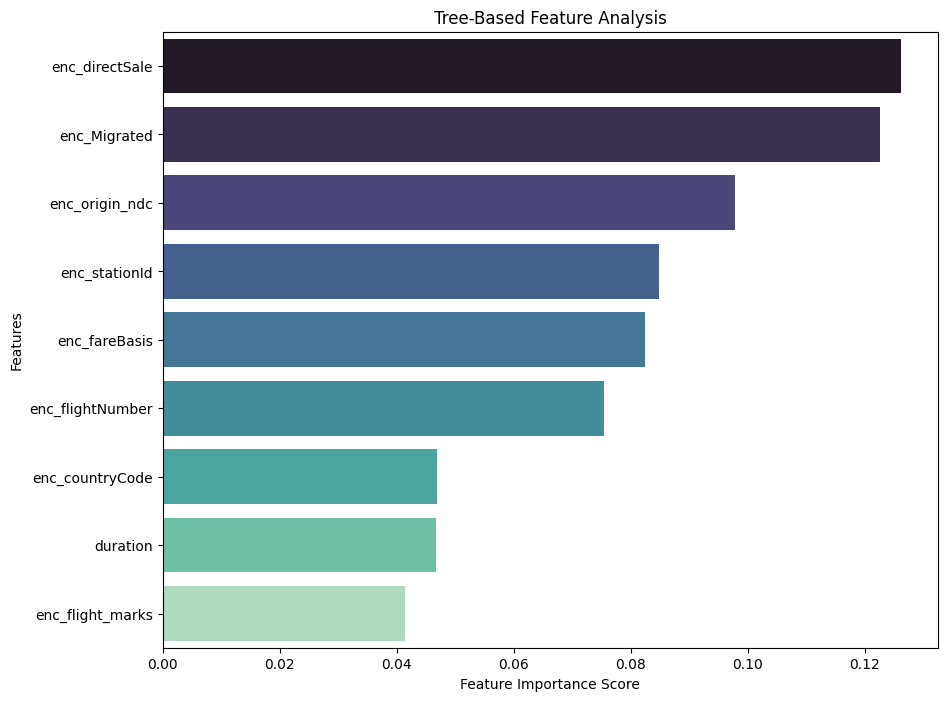

In [35]:
#feature importance top 10
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False).head(35)
priorized = feature_scores.index[0:9].to_list()
sns.barplot(x=feature_scores[0:9], y=feature_scores.index[0:9],palette="mako").set_title('Tree-Based Feature Analysis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.rcParams["figure.figsize"] = (10, 8)

In [32]:
for i in priorized:
    texto = i
    substring = "enc_"
    if texto.find(substring) != -1:
        text = texto[4:]
        left = pd.DataFrame(df1[(df1["target"] == 1)].groupby(text).count().target.sort_values(ascending = False))
        right = pd.DataFrame(df1[(df1["target"] == 0)].groupby(text).count().target.sort_values(ascending = False))
        data_comparada = left.merge(right, left_index = True, right_index =True)
        data_comparada.columns = ["Valor_1", "valor_0"]
        data_comparada["prctg_1"] = data_comparada["Valor_1"]/(data_comparada["Valor_1"]+data_comparada["valor_0"])
        data_comparada = data_comparada.sort_values("prctg_1", ascending = False)
        print(f"la comparación de {text} es:\n{data_comparada}\n\n")
    else:
        text = i
        left = pd.DataFrame(df1[(df1["target"] == 1)].groupby(text).count().target.sort_values(ascending = False))
        right = pd.DataFrame(df1[(df1["target"] == 0)].groupby(text).count().target.sort_values(ascending = False))
        data_comparada = left.merge(right, left_index = True, right_index =True)
        data_comparada.columns = ["Valor_1", "valor_0"]
        data_comparada["prctg_1"] = data_comparada["Valor_1"]/(data_comparada["Valor_1"]+data_comparada["valor_0"])
        data_comparada = data_comparada.sort_values("prctg_1", ascending = False)
        print(f"la comparación de {text} es:\n{data_comparada}\n\n")

la comparación de directSale es:
            Valor_1  valor_0   prctg_1
directSale                            
False         16996     1571  0.915388
True           8533    24203  0.260661


la comparación de Migrated es:
          Valor_1  valor_0   prctg_1
Migrated                            
True        19389     2357  0.891612
False        6140    23417  0.207734


la comparación de origin_ndc es:
            Valor_1  valor_0   prctg_1
origin_ndc                            
GDS           17060     1596  0.914451
UNKNOWN        1998      284  0.875548
WEB            6457    23894  0.212744


la comparación de stationId es:
            Valor_1  valor_0   prctg_1
stationId                             
75970344.0      488        3  0.993890
75924623.0      157        2  0.987421
7655076.0        78        1  0.987342
9150028.0       301        4  0.986885
7570682.0       186        4  0.978947
...             ...      ...       ...
79993701.0        4      125  0.031008
76962266.0     